In [1]:
library(SummarizedExperiment)
library(DESeq2)
library(tidyverse)
library(cowplot)
library(ExploreModelMatrix)
library(ComplexHeatmap)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

In [2]:
counts = read.csv("counts.csv",
                      row.names = 1)

In [31]:
sample_info = read.csv("pbmc_sample_list.csv", row.names = 1)  

In [32]:
sample_info

,Gender,Ethnicity,Condition
,<chr>,<chr>,<chr>
HS_42,F,Caucasian,HS
HS_110,F,Caucasian,HS
HS_129,F,African American,HS
HS_132,F,Asian,HS
HS_157,F,Caucasian,HS
HS_164,F,Caucasian,HS
HS_285,M,South Asian,HS
HS_296,F,Caucasian,HS
HS_299,F,Caucasian,HS


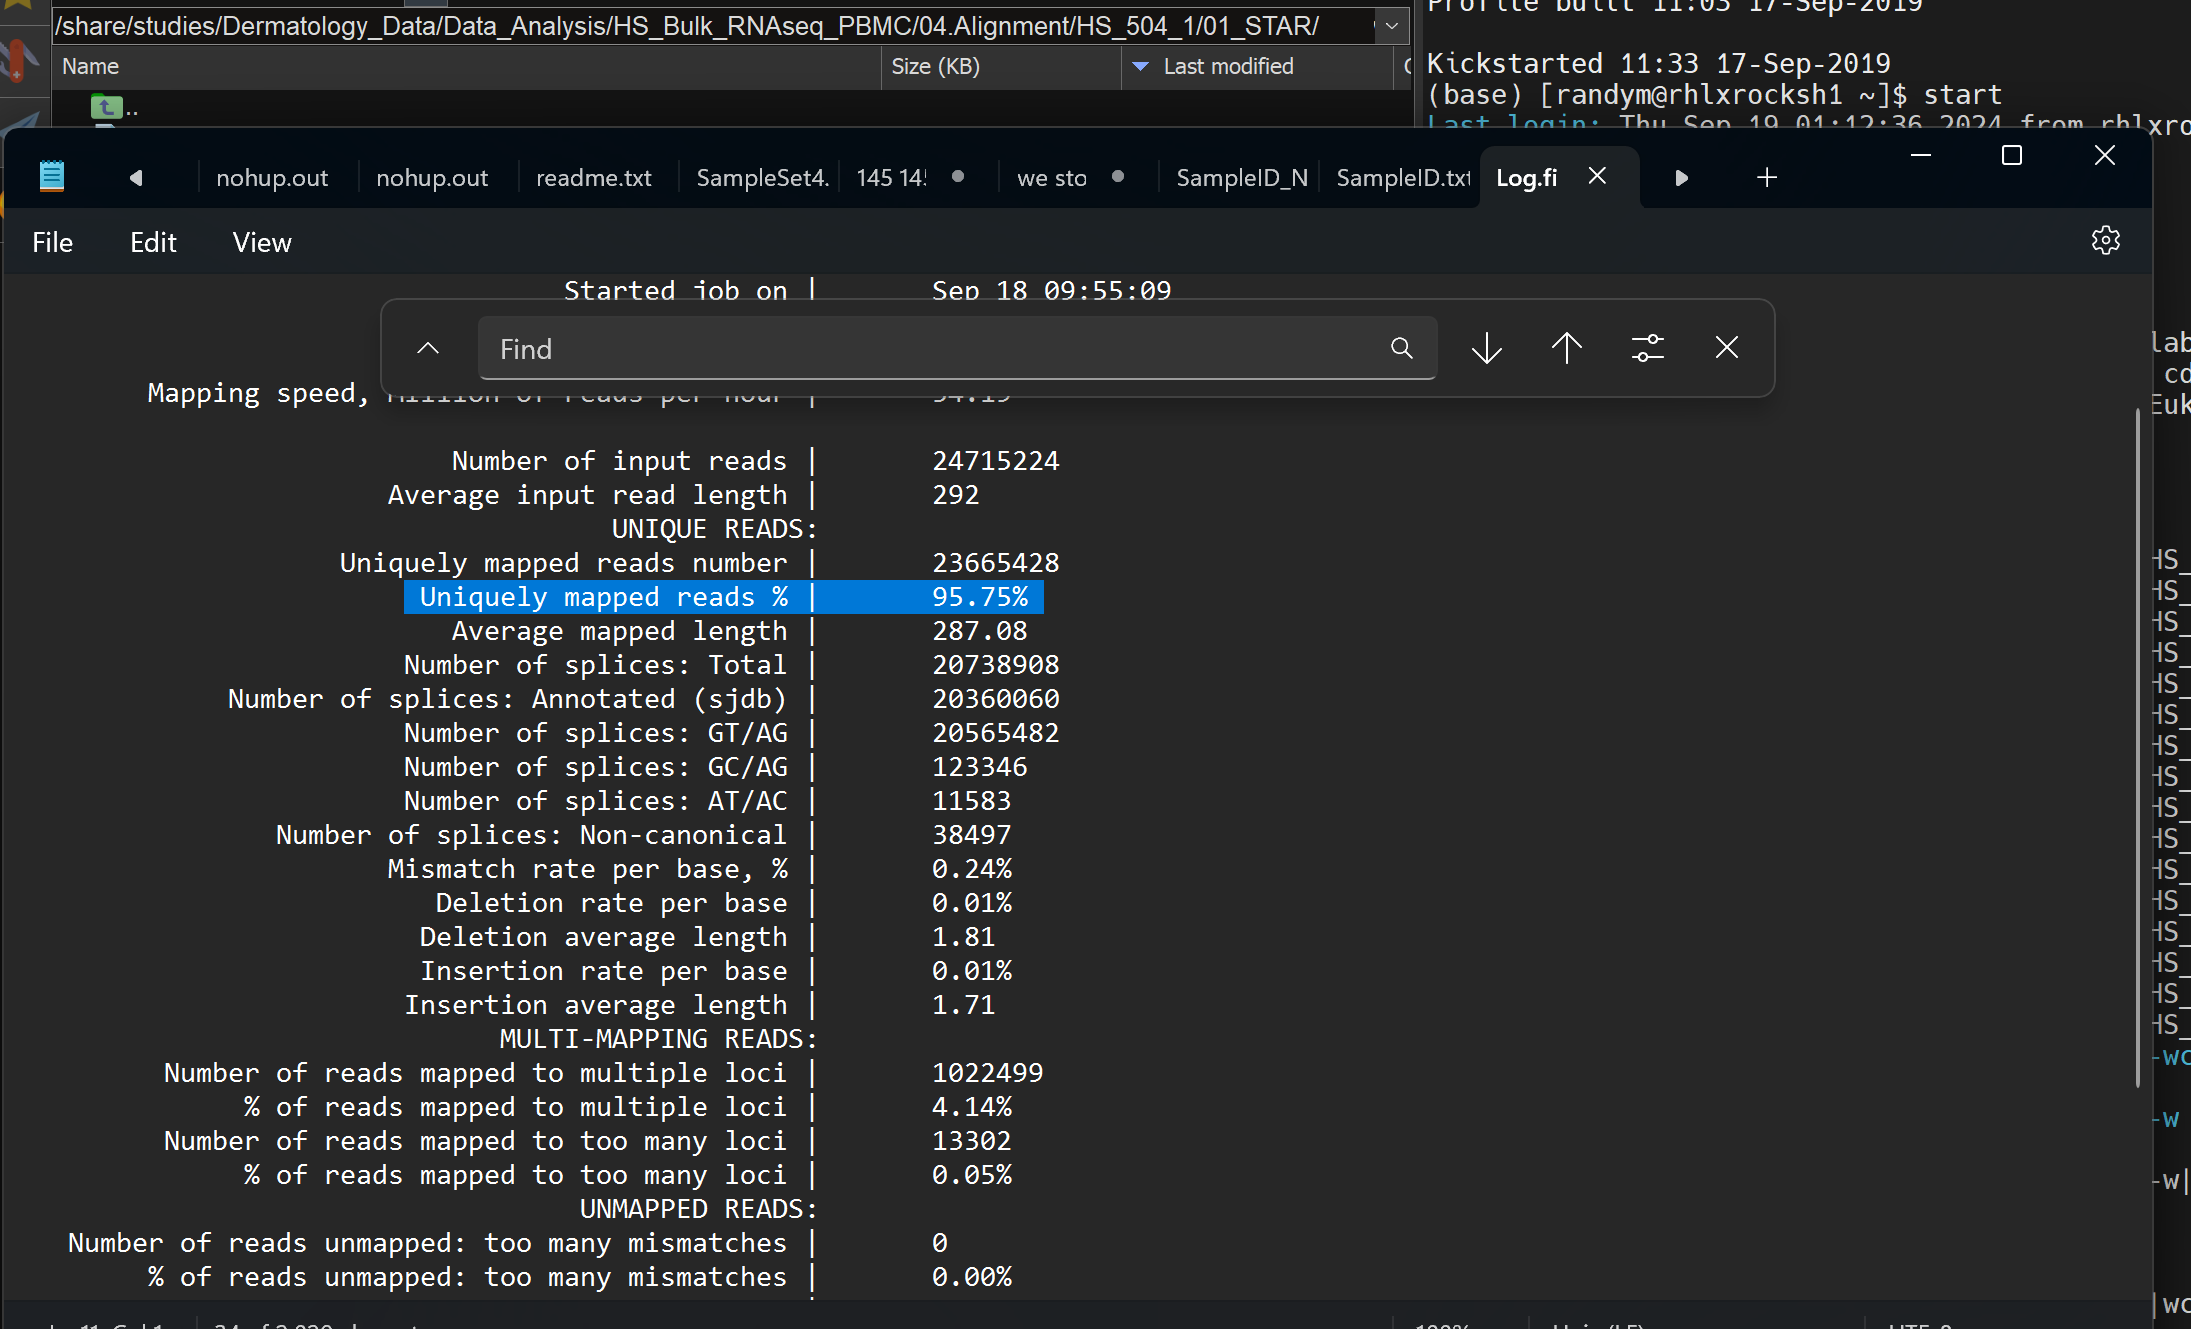

In [5]:
# number of genes with non-zero reads (comp polya)

counts

,HS_42,HS_110,HS_129,HS_132,HS_157,HS_164,HS_285,HS_296,HS_299,HS_300,⋯,HS_710,HS_712,WSU_68,WSU_69,WSU_111,WSU_119,WSU_122,WSU_124,WSU_126,WSU_135
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000290825.1,5,23,7,18,14,8,1,12,59,2,⋯,7,11,6,4,15,14,1,11,16,12
ENSG00000223972.6,5,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000227232.6,619,1013,589,813,641,734,196,251,389,34,⋯,498,87,347,678,519,1188,536,427,1117,314
ENSG00000278267.1,23,6,19,7,20,11,0,1,9,0,⋯,15,0,3,18,15,23,22,11,11,8
ENSG00000243485.5,2,0,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
ENSG00000284332.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237613.2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000268020.3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000290826.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
index <- match(colnames(counts), rownames(sample_info))

In [33]:
se <- SummarizedExperiment(assays = list(counts = as.matrix(counts)),
                           colData = sample_info)


In [35]:
rowData(se)["gene_id"] = row.names(rowData(se))
rowData(se)$gene_id_reduced <- sub("\\..*", "", rowData(se)$gene_id)
row.names(se) = rowData(se)[["gene_id_reduced"]]
anyDuplicated(row.names(se))

In [27]:
write.csv(rowData(se)["gene_id_reduced"], file = "gene_ids.csv", row.names = FALSE)

In [37]:
grch_symbols = read.csv("symbols.csv", row.names = 1)

In [38]:
common_indices <- intersect(rownames(rowData(se)), rownames(grch_symbols))

rowData(se)[common_indices,"symbol"] = grch_symbols[common_indices,"symbol"]

In [14]:
head(rowData(se))

DataFrame with 6 rows and 3 columns
                          gene_id gene_id_reduced      symbol
                      <character>     <character> <character>
ENSG00000290825 ENSG00000290825.1 ENSG00000290825     DDX11L2
ENSG00000223972 ENSG00000223972.6 ENSG00000223972     DDX11L1
ENSG00000227232 ENSG00000227232.6 ENSG00000227232      WASH7P
ENSG00000278267 ENSG00000278267.1 ENSG00000278267   MIR6859-1
ENSG00000243485 ENSG00000243485.5 ENSG00000243485 MIR1302-2HG
ENSG00000284332 ENSG00000284332.1 ENSG00000284332   MIR1302-2

In [26]:
se

class: SummarizedExperiment 
dim: 63140 138 
metadata(0):
assays(1): counts
rownames(63140): ENSG00000290825 ENSG00000223972 ... ENSG00000278625
  ENSG00000277374
rowData names(3): gene_id gene_id_reduced symbol
colnames(138): HS_42 HS_110 ... WSU_126 WSU_135
colData names(3): Gender Ethnicity Condition

In [39]:
dds <- DESeqDataSet(se, design = ~ Condition + Ethnicity + Gender)

Warning message in DESeqDataSet(se, design = ~Condition + Ethnicity + Gender):
"some variables in design formula are characters, converting to factors"
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [40]:
dds <- estimateSizeFactors(dds)

# Estimate dispersion parameter for negative binomial distribution
dds <- estimateDispersions(dds)

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates



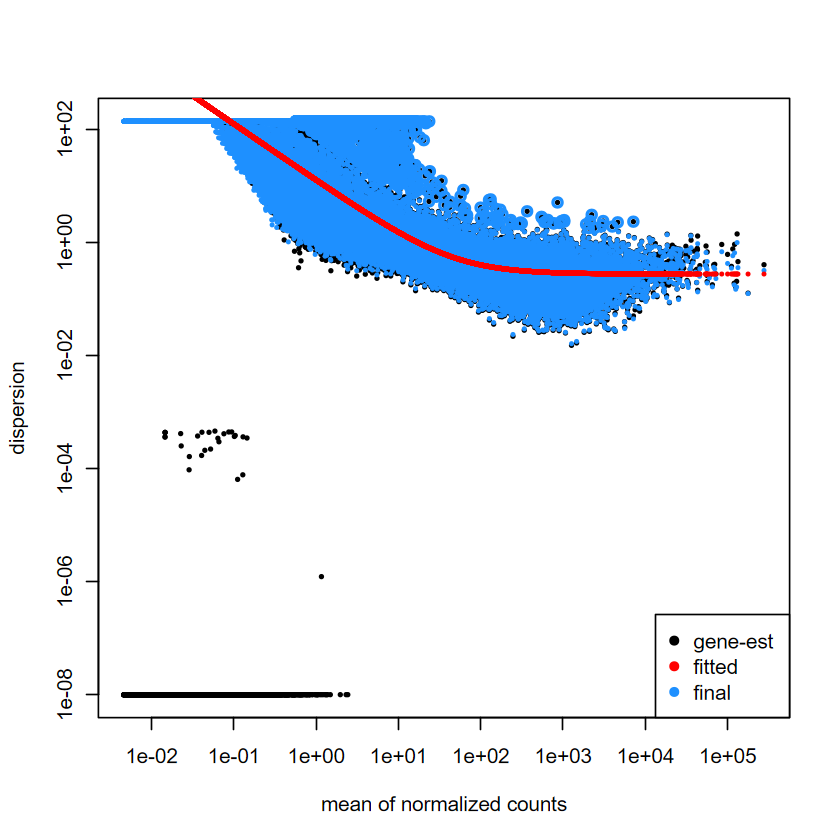

In [41]:
plotDispEsts(dds)

In [43]:
dds <- nbinomWaldTest(dds, maxit = 120)

found results columns, replacing these

1 rows did not converge in beta, labelled in mcols(object)$betaConv. Use larger maxit argument with nbinomWaldTest



In [46]:
res <- results(dds, contrast = c('Condition', 'HS', 'HC'))

In [47]:
res

log2 fold change (MLE): Condition HS vs HC 
Wald test p-value: Condition HS vs HC 
DataFrame with 63140 rows and 6 columns
                   baseMean log2FoldChange     lfcSE        stat    pvalue
                  <numeric>      <numeric> <numeric>   <numeric> <numeric>
ENSG00000290825   12.498830     -1.2319607  0.788376 -1.56265582  0.118134
ENSG00000223972    0.107443     -0.0327970 10.138433 -0.00323492  0.997419
ENSG00000227232  586.451864     -0.1233019  0.601423 -0.20501699  0.837559
ENSG00000278267   10.262928      0.0688916  0.970690  0.07097184  0.943420
ENSG00000243485    0.237518     -0.9446078  3.272962 -0.28860946  0.772880
...                     ...            ...       ...         ...       ...
ENSG00000276017  0.04428326      -0.193873  10.13843  -0.0191226  0.984743
ENSG00000278817 11.02987005      -0.525267   1.01340  -0.5183192  0.604236
ENSG00000277196  5.60726910      -0.771711   1.31548  -0.5866366  0.557448
ENSG00000278625  0.00544552      -0.207479  10.13843

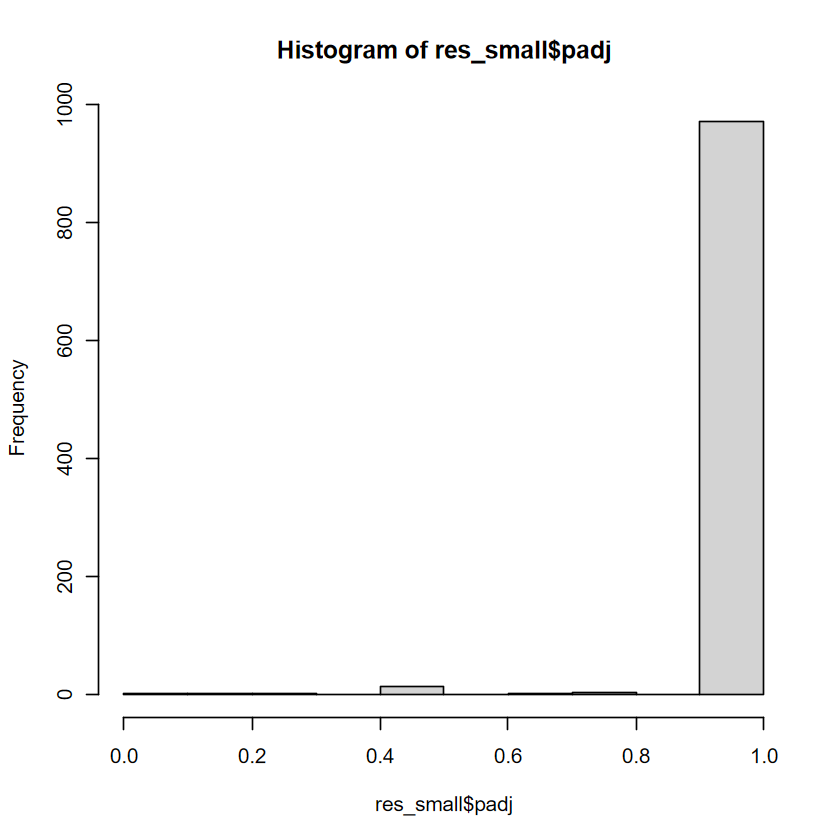

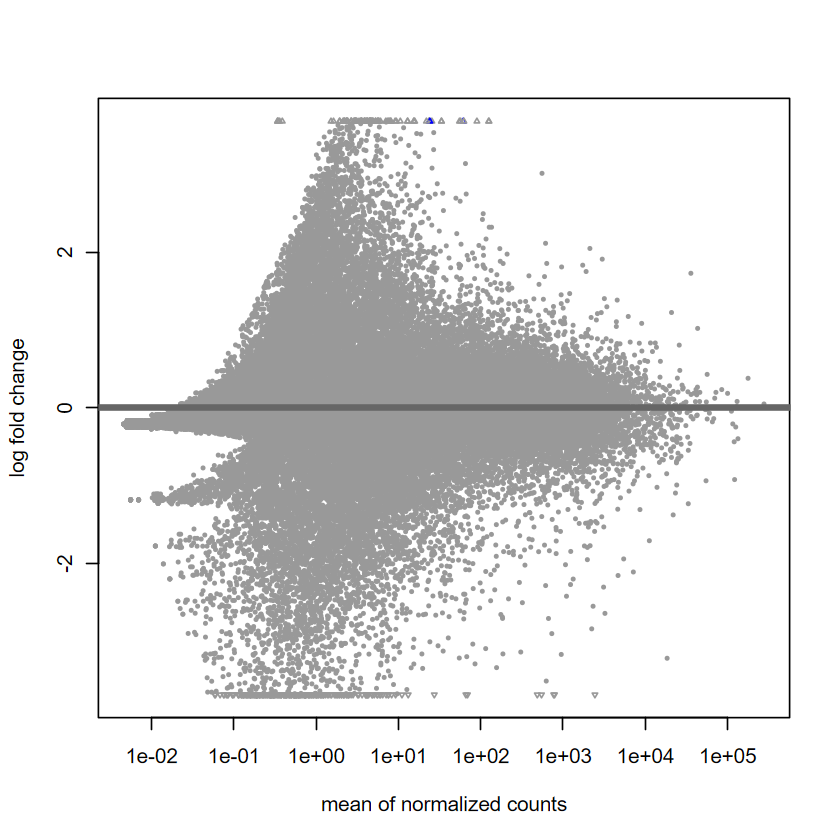

In [58]:
res_small = res[order(res$pvalue),] %>% head(1000)

# nice p value curve with no spikes mean you have a good chunk of
# differentially expressed genes
hist(res_small$padj)

# not enough HC

plotMA(res)

In [59]:
saveRDS(dds, "dds_factor.rds")

Warning message in DESeqDataSet(se, design = ~Condition):
"some variables in design formula are characters, converting to factors"
gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



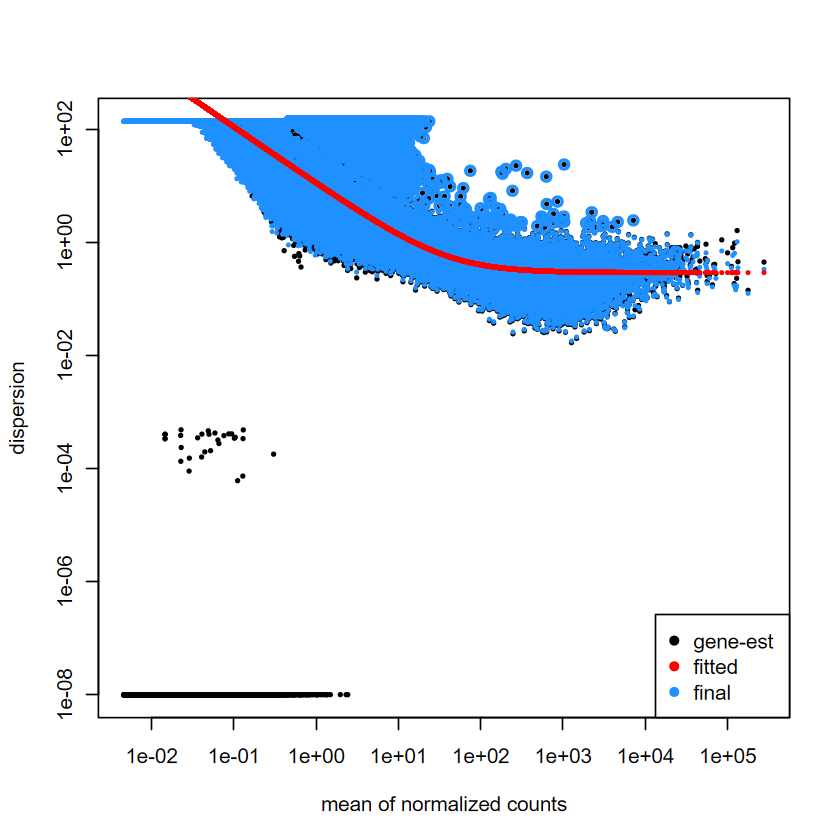

In [60]:
dds_s <- DESeqDataSet(se, design = ~ Condition)

dds_s <- estimateSizeFactors(dds_s)

# Estimate dispersion parameter for negative binomial distribution
dds_s <- estimateDispersions(dds_s)

plotDispEsts(dds_s)

dds_s <- nbinomWaldTest(dds_s, maxit = 120)

In [64]:
res_s <- results(dds_s, contrast = c('Condition', 'HS', 'HC'))